In [1]:
from pokemon_classification_functions import get_datapoints, get_testpoints, plot_datapoints, get_distance_between_points, output_classification_for_testpoints

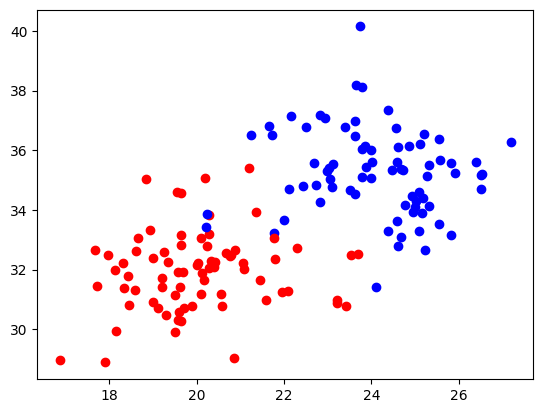

In [2]:
datapoints = get_datapoints()

plot_datapoints(datapoints)

In [3]:
testpoints = get_testpoints()

output_classification_for_testpoints(testpoints, datapoints)

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu
